In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
import matplotlib.pyplot as plt

In [2]:
# load MNIST data 

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28,1)

train_labels = tf.one_hot(train_labels, depth=10)
test_labels = tf.one_hot(test_labels, depth=10)

val_data_size = round(len(train_images)*0.15)
val_images = train_images[0:val_data_size]
val_labels = train_labels[0:val_data_size]
train_images = train_images[val_data_size:]
train_labels = train_labels[val_data_size:]

tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(10,), dtype=float32)


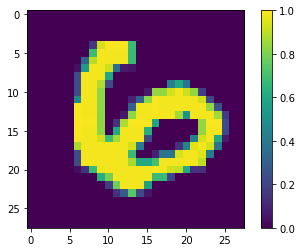

In [4]:
# plot example image

plt.imshow(train_images[0].reshape((28,28)))
plt.colorbar()
print(train_labels[0])

In [6]:
# define model

model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [9]:
# compile and train model

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='mnist_classifier/model.{epoch:02d}-{val_loss:.2f}.h5'),
]

model.fit(train_images,
         train_labels,
         batch_size=32,
         epochs=30,
         validation_data=(val_images, val_labels),
         callbacks=my_callbacks)

Train on 51000 samples, validate on 9000 samples
Epoch 1/30
51000/51000 [==============================] - 24s 480us/sample - loss: 0.3323 - accuracy: 0.8958 - val_loss: 0.0916 - val_accuracy: 0.9709
Epoch 2/30
51000/51000 [==============================] - 24s 469us/sample - loss: 0.1231 - accuracy: 0.9622 - val_loss: 0.0579 - val_accuracy: 0.9827
Epoch 3/30
51000/51000 [==============================] - 24s 476us/sample - loss: 0.0974 - accuracy: 0.9702 - val_loss: 0.0506 - val_accuracy: 0.9850
Epoch 4/30
51000/51000 [==============================] - 26s 509us/sample - loss: 0.0814 - accuracy: 0.9751 - val_loss: 0.0480 - val_accuracy: 0.9859
Epoch 5/30
51000/51000 [==============================] - 25s 482us/sample - loss: 0.0745 - accuracy: 0.9762 - val_loss: 0.0510 - val_accuracy: 0.9847
Epoch 6/30
51000/51000 [==============================] - 26s 509us/sample - loss: 0.0670 - accuracy: 0.9797 - val_loss: 0.0393 - val_accuracy: 0.9887
Epoch 7/30
51000/51000 [=====================

In [11]:
# evaluate model

model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.030294936355078243, 0.9908]